## Prepare colab

In [1]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# For some reason needed to make everything work
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
! sudo apt-get install texlive-fonts-extra
! apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [3]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np
import pandas as pd
from scipy import stats

import watermark

from google.colab import drive


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dir = "/content/drive/MyDrive/MRP Idiom Translation/Survey Analysis/"
plt.style.use(dir+'CDS_paper.mplstyle')
tab10 = plt.get_cmap("tab10").colors
tab20 = plt.get_cmap("tab20").colors

%matplotlib inline
%load_ext watermark
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.188+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

pandas    : 1.3.5
watermark : 2.3.1
IPython   : 5.5.0
google    : 2.0.3
numpy     : 1.21.6
matplotlib: 3.2.2
scipy     : 1.4.1



## Load our data

In [6]:
file_path = "/content/drive/MyDrive/MRP Idiom Translation/Survey Analysis/"
save_path = file_path + "Report figures/"

In [7]:
# Clean dataframe
def clean_df(df):
  # Remove irrelevant columns
  df.drop(df.columns[0:19], axis=1, inplace=True)
  df.drop(df.columns[92:95], axis=1, inplace=True)
  df.drop([0,1], axis=0, inplace=True)
  df.reset_index(drop=True, inplace=True)

  # Rename questions that for some reason have a weird name
  df.rename({"Q97_1":"QD-R9_1", "Q97_2":"QD-R9_2", "Q97_3":"QD-R9_3", "QC-R5-1.1": "QC-R5-2"}, axis=1, inplace=True)

  for col in df.columns:
    for i in range(len(df)):
      if df[col].iloc[i] is np.nan:
        df[col].iloc[i] = 0 # Set all NaN's to zero
      else:
        df[col].iloc[i] = int(df[col].iloc[i])    
      
  return df

In [8]:
# Load survey data
df_all = pd.read_csv(file_path+"survey_all.csv")
df_filt1 = pd.read_csv(file_path+"survey_filtered.csv") # Filtered for EN>=2, DE=3

df_all = clean_df(df_all)
df_filt1 = clean_df(df_filt1)

In [9]:
def quest_dict(df):
  quest = dict()
  for col in df.columns:
    ans = list(df[col])
    ans = [val for val in ans if val != 0]
    quest[col] = ans
  return quest 


In [10]:
# quest = quest_dict(df_all)
quest = quest_dict(df_filt1)


print(quest)

{'QB-F1-1': [4, 2, 4, 3, 5, 4, 4, 3, 4, 2, 2, 3, 5, 2, 5, 2, 3, 5, 5, 5, 3, 5, 4, 4, 5, 5, 2, 3, 2, 5, 3, 2, 4, 3, 4, 2, 5, 4, 4, 5, 5, 4, 3, 4, 4, 4, 5, 5, 4, 4, 5, 4], 'QB-F1-2': [3, 3, 3, 2, 3, 2, 5, 2, 2, 3, 3, 4, 3, 4, 3, 5, 5, 4, 3, 5, 3, 2, 2, 2, 4, 5, 5, 4, 4, 5, 3, 3, 4, 2, 3, 4, 4, 2, 4, 4, 3, 5, 3, 2, 3, 3, 2, 5, 3, 3, 5, 3, 3], 'QB-F2-1': [5, 1, 4, 3, 5, 5, 4, 4, 5, 3, 2, 4, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 4, 4, 3, 5, 4, 4, 2, 5, 1, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 3, 5, 5, 4, 5, 5, 5, 4], 'QB-F2-2': [4, 1, 4, 1, 5, 5, 2, 4, 4, 3, 1, 4, 2, 2, 2, 4, 5, 5, 5, 5, 4, 5, 4, 3, 3, 4, 5, 2, 5, 1, 5, 5, 3, 4, 2, 2, 1, 3, 5, 5, 5, 5, 2, 3, 2, 5, 5, 3, 5, 5, 5, 3], 'QB-R1-1': [5, 4, 4, 2, 2, 3, 4, 2, 4, 4, 5, 5, 5, 5, 4, 5], 'QB-R1-2': [2, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 1, 1, 2, 4, 1], 'QB-R2-1': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5], 'QB-R2-2': [5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5], 'QB-R3-1': [2, 2, 1, 4, 2, 1, 5, 4, 3, 4, 2, 4], 'QB-R3-2': [1, 1, 1, 1, 2, 1, 2, 1, 

In [11]:
# Columns to take for each section
# cols = df_all.columns
cols = df_filt1.columns

e2e_fluent_col = cols[0:27:2]
e2e_meaning_col = cols[1:28:2]
pipe_fluent_col = cols[28:55:2]
pipe_meaning_col = cols[29:56:2]

base_comp_col = [cols[i] for i in [57,61,64,65,68,73,75,79,81,85,88,89]]
e2e_comp_col = [cols[i] for i in [58,59,63,66,70,71,76,78,80,84,87,90]]
pipe_comp_col = [cols[i] for i in [56,60,62,67,69,72,74,77,82,83,86,91]]

In [12]:
# Make dataframe for each section
def dict_from_cols(cols):
  dic = dict()
  for col in cols:
    dic[col] = quest[col]
  return dic

In [13]:
# Arrays for each section
e2e_fluent = dict_from_cols(e2e_fluent_col)
e2e_meaning = dict_from_cols(e2e_meaning_col)
pipe_fluent = dict_from_cols(pipe_fluent_col)
pipe_meaning = dict_from_cols(pipe_meaning_col)

base_comp = dict_from_cols(base_comp_col)
e2e_comp = dict_from_cols(e2e_comp_col)
pipe_comp = dict_from_cols(pipe_comp_col)

## Plot preparation

In [14]:
def boxplot(ax, data, loc, color=(0, 0, 0)):    

    ax.fill_between([data.quantile(q=0.25), data.quantile(q=0.75)], loc - 0.20, loc + 0.20,
                    facecolor=(*color, 0.4), edgecolor=color, lw=3, zorder=3)
    ax.vlines(data.median(), loc - 0.35, loc + 0.35, color=color, zorder=3)
    ax.plot(data.mean(), loc, color=color, lw=0, marker="*", ms=8, mew=2, zorder=3)

    ax.plot([data.min(), data.max()], [loc, loc], color=color, lw=0, marker=".", ms=8, mew=2, zorder=3)
    ax.plot([data.min(), data.quantile(q=0.25)], [loc, loc], color=color, marker="", zorder=3)
    ax.plot([data.quantile(q=0.75), data.max()], [loc, loc], color=color, marker="", zorder=3)

    
    return ax


def check_significance(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""


def annotate_stats(ax, D, R, loc):
    W = stats.ttest_ind(D, R, equal_var=False)
    ax.annotate(r"{}".format(check_significance(W.pvalue)), (0.99, loc + 1.5),
                xycoords="data", ha="right", va="top", fontsize=16)
    
    return ax

# Figures

### Figure - E2E Fluency

3.7308992949996984


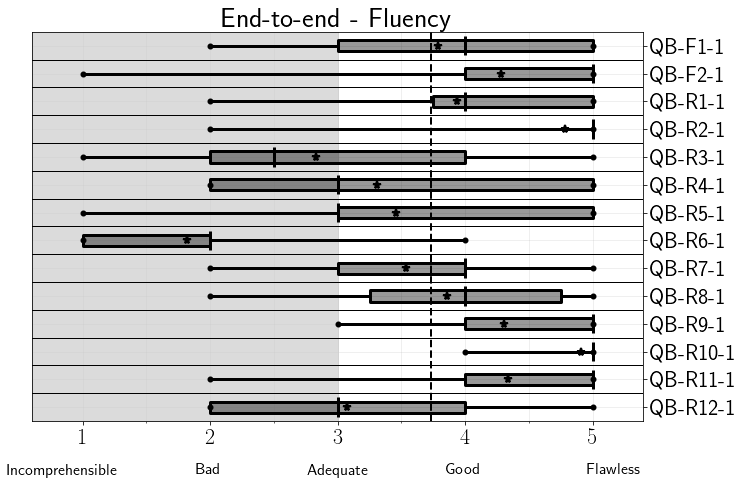

In [15]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(20, 40)

ax = fig.add_subplot(gs[8:, 18:])

num = 1
for col in e2e_fluent_col:
  ax = boxplot(ax, pd.Series(e2e_fluent[col]), num, color = (0, 0, 0))
  num += 1


# Calculate mean of means
mu = 0
for col in e2e_fluent_col:
  mu += np.mean(e2e_fluent[col])
mu = mu/len(e2e_fluent_col)
print(mu)

ax.vlines(mu,-1, len(e2e_fluent_col) + 1, color='k', lw=2, zorder=2, linestyles="dashed")

ax.fill_between([0, 3], len(e2e_fluent_col) + 1, color='0.8', alpha=0.7, zorder=2)
ax.hlines(np.arange(1.5, len(e2e_fluent_col) + 1), 0, 6, color="k", lw=1, zorder=2)

ax.set_xlim(left=0.6, right=5.4)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.5))
ax.set_ylim(bottom=0.5, top=len(e2e_fluent_col) + 0.5)
ax.set_yticks(np.arange(1, len(e2e_fluent_col) + 1))
ax.set_yticklabels([""] + e2e_fluent_col)

ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.annotate("Incomprehensible", (0.05, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Flawless", (0.95, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Adequate", (0.5, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Bad", (0.29, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Good", (0.705, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")

ax.set_title("End-to-end - Fluency")

fig.savefig(save_path+"e2e_fluency_filt1.png", facecolor='w', edgecolor='w',
            bbox_inches='tight')

### Figure - Pipeline Fluency

3.6510397004163844


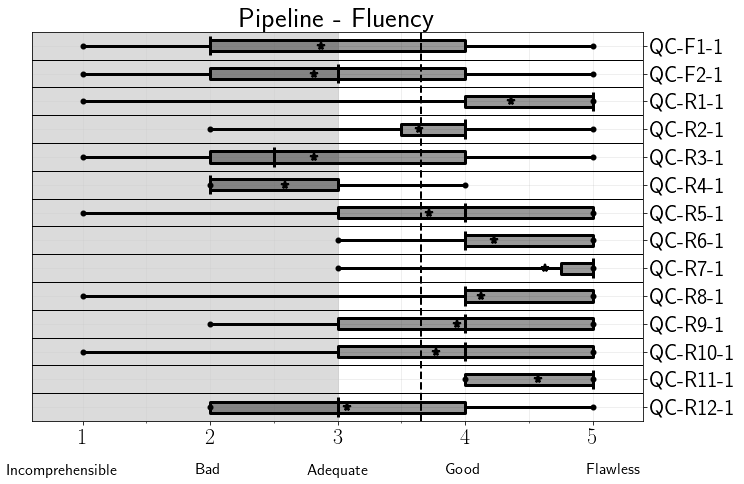

In [16]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(20, 40)

ax = fig.add_subplot(gs[8:, 18:])

num = 1
for col in pipe_fluent_col:
  ax = boxplot(ax, pd.Series(pipe_fluent[col]), num, color = (0, 0, 0))
  num += 1


# Calculate mean of means
mu = 0
for col in pipe_fluent_col:
  mu += np.mean(pipe_fluent[col])
mu = mu/len(pipe_fluent_col)
print(mu)

ax.vlines(mu,-1, len(pipe_fluent_col) + 1, color='k', lw=2, zorder=2, linestyles="dashed")

ax.fill_between([0, 3], len(pipe_fluent_col) + 1, color='0.8', alpha=0.7, zorder=2)
ax.hlines(np.arange(1.5, len(pipe_fluent_col) + 1), 0, 6, color="k", lw=1, zorder=2)

ax.set_xlim(left=0.6, right=5.4)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.5))
ax.set_ylim(bottom=0.5, top=len(pipe_fluent_col) + 0.5)
ax.set_yticks(np.arange(1, len(pipe_fluent_col) + 1))
ax.set_yticklabels([""] + pipe_fluent_col)

ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.annotate("Incomprehensible", (0.05, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Flawless", (0.95, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Adequate", (0.5, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Bad", (0.29, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Good", (0.705, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")

ax.set_title("Pipeline - Fluency")

fig.savefig(save_path+"pipe_fluency_filt1.png", facecolor='w', edgecolor='w',
            bbox_inches='tight')

### Figure - E2E Meaning

3.297846975576086


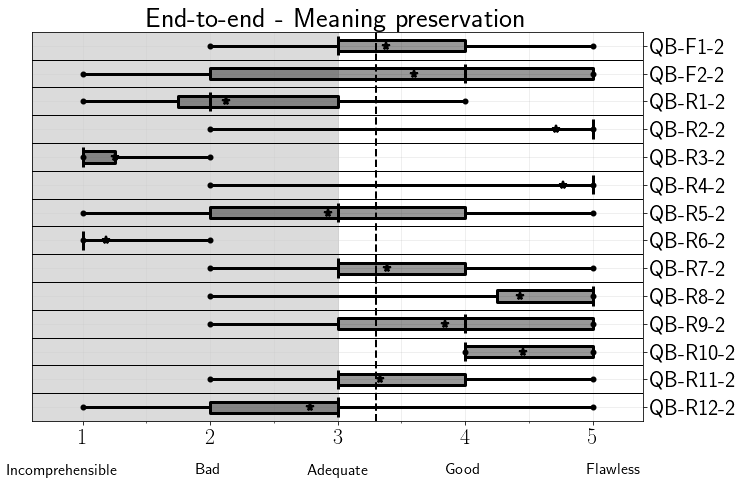

In [17]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(20, 40)

ax = fig.add_subplot(gs[8:, 18:])

num = 1
for col in e2e_meaning_col:
  ax = boxplot(ax, pd.Series(e2e_meaning[col]), num, color = (0, 0, 0))
  num += 1


# Calculate mean of means
mu = 0
for col in e2e_meaning_col:
  mu += np.mean(e2e_meaning[col])
mu = mu/len(e2e_meaning_col)
print(mu)

ax.vlines(mu,-1, len(e2e_meaning_col) + 1, color='k', lw=2, zorder=2, linestyles="dashed")

ax.fill_between([0, 3], len(e2e_meaning_col) + 1, color='0.8', alpha=0.7, zorder=2)
ax.hlines(np.arange(1.5, len(e2e_meaning_col) + 1), 0, 6, color="k", lw=1, zorder=2)

ax.set_xlim(left=0.6, right=5.4)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.5))
ax.set_ylim(bottom=0.5, top=len(e2e_meaning_col) + 0.5)
ax.set_yticks(np.arange(1, len(e2e_meaning_col) + 1))
ax.set_yticklabels([""] + e2e_meaning_col)

ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.annotate("Incomprehensible", (0.05, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Flawless", (0.95, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Adequate", (0.5, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Bad", (0.29, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Good", (0.705, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")

ax.set_title("End-to-end - Meaning preservation")

fig.savefig(save_path+"e2e_meaning_filt1.png", facecolor='w', edgecolor='w',
            bbox_inches='tight')

### Figure - Pipeline Meaning

3.2889402488796016


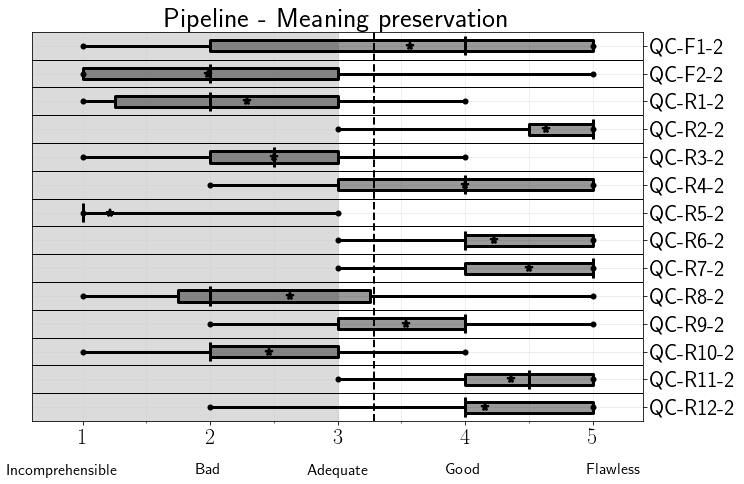

In [18]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(20, 40)

ax = fig.add_subplot(gs[8:, 18:])

num = 1
for col in pipe_meaning_col:
  ax = boxplot(ax, pd.Series(pipe_meaning[col]), num, color = (0, 0, 0))
  num += 1

# Calculate mean of means
mu = 0
for col in pipe_meaning_col:
  mu += np.mean(pipe_meaning[col])
mu = mu/len(pipe_meaning_col)
print(mu)

ax.vlines(mu,-1, len(pipe_meaning_col) + 1, color='k', lw=2, zorder=2, linestyles="dashed")

ax.fill_between([0, 3], len(pipe_meaning_col) + 1, color='0.8', alpha=0.7, zorder=2)
ax.hlines(np.arange(1.5, len(pipe_meaning_col) + 1), 0, 6, color="k", lw=1, zorder=2)

ax.set_xlim(left=0.6, right=5.4)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.5))
ax.set_ylim(bottom=0.5, top=len(pipe_meaning_col) + 0.5)
ax.set_yticks(np.arange(1, len(pipe_meaning_col) + 1))
ax.set_yticklabels([""] + pipe_meaning_col)

ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.annotate("Incomprehensible", (0.05, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Flawless", (0.95, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Adequate", (0.5, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Bad", (0.29, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Good", (0.705, -0.125),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")

ax.set_title("Pipeline - Meaning preservation")

fig.savefig(save_path+"pipe_meaning_filt1.png", facecolor='w', edgecolor='w',
            bbox_inches='tight')

### Figure - Comparison

In [19]:
# Make list of questions
comp_quest = ["QD-F1", "QD-F2", "QD-R1", "QD-R2", "QD-R3", "QD-R4" ,"QD-R5", "QD-R6", "QD-R7", "QD-R8", "QD-R9", "QD-R10"]

1.816721864322249
2.2414664922572802
1.9418116434204709


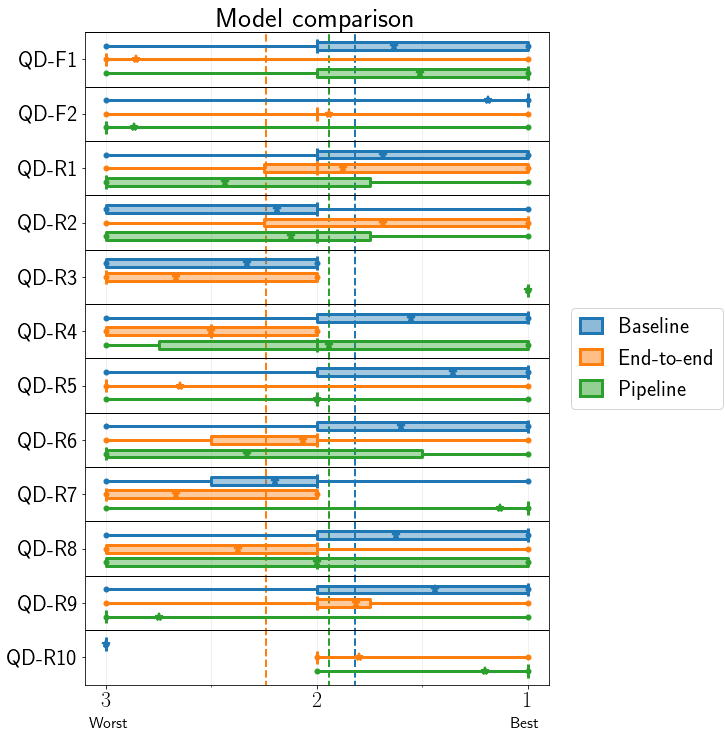

In [20]:
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(8, 12)
ax2 = fig.add_subplot(gs[:,10:])
ax2.set_axis_off()

ax = fig.add_subplot(gs[:, :10])

for num in range(12):
  ax = boxplot(ax, pd.Series(base_comp[base_comp_col[num]]), num * 2.8 + 0.7, color=tab10[0])
  ax = boxplot(ax, pd.Series(e2e_comp[e2e_comp_col[num]]), num * 2.8 + 1.4, color=tab10[1])
  ax = boxplot(ax, pd.Series(pipe_comp[pipe_comp_col[num]]), num * 2.8 + 2.1, color=tab10[2])

# # Calculate mean of means
mu1 = 0
for col in base_comp_col:
  mu1 += np.mean(base_comp[col])
mu1 = mu1/len(base_comp_col)
ax.vlines(mu1,-1, 33.6, color=tab10[0], lw=2, zorder=2, linestyles="dashed")
print(mu1)

mu2 = 0
for col in e2e_comp_col:
  mu2 += np.mean(e2e_comp[col])
mu2 = mu2/len(e2e_comp_col)
ax.vlines(mu2,-1, 33.6, color=tab10[1], lw=2, zorder=2, linestyles="dashed")
print(mu2)

mu3 = 0
for col in pipe_comp_col:
  mu3 += np.mean(pipe_comp[col])
mu3 = mu3/len(pipe_comp_col)
ax.vlines(mu3,-1, 33.6, color=tab10[2], lw=2, zorder=2, linestyles="dashed")
print(mu3)

ax.hlines(np.arange(0, 12*2.8, 2.8), -0.1, 3.1, color="k", lw=1, zorder=2)

ax.set_xlim(left=0.9, right=3.1)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.5))
ax.invert_xaxis()
ax.set_ylim(bottom=0, top= 33.6)
ax.set_yticks(np.arange(1.4, 12*2.8, 2.8))
ax.set_yticklabels(comp_quest)

ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.grid(axis="y", which="major", b=False)

t = mpatches.Patch(fc=(*tab10[0], 0.5), ec="C0", lw=3)
t2 = mpatches.Patch(fc=(*tab10[1], 0.5), ec="C1", lw=3)
t3 = mpatches.Patch(fc=(*tab10[2], 0.5), ec="C2", lw=3)


fig.legend([t, t2, t3], [r"Baseline", r"End-to-end", r"Pipeline"], loc="upper right", bbox_to_anchor=(1.02, 0.51))


ax.annotate("Worst", (0.05, -0.06),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate("Best", (0.95, -0.06),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")

ax.set_title("Model comparison")

fig.savefig(save_path+"comparison_filt1.png", facecolor='w', edgecolor='w',
            bbox_inches='tight')